In [2]:
import pandas as pd

In [3]:
fires_data = pd.read_csv('new_fires_data.csv')

# Display the first few rows of the DataFrame
fires_data.head().T

<ipython-input-3-9c2aeeb1eff2>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_data = pd.read_csv('new_fires_data.csv')


,0,1,2,3,4
FIRE_YEAR,2004,2004,2004,2004,2004
DISCOVERY_DATE,2004-05-11,2004-05-30,2004-06-27,2004-06-27,2004-06-29
DISCOVERY_DOY,133,152,180,180,182
DISCOVERY_TIME,08:45:00,19:21:00,16:00:00,16:00:00,18:00:00
STAT_CAUSE_CODE,1.0,5.0,1.0,1.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Lightning,Lightning,Lightning
FIRE_SIZE,0.25,0.1,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,38.933056,38.984167,38.559167,38.559167,38.635278
LONGITUDE,-120.404444,-120.735556,-119.913333,-119.933056,-120.103611


In [4]:
fires_data.dtypes

FIRE_YEAR              int64
DISCOVERY_DATE        object
DISCOVERY_DOY          int64
DISCOVERY_TIME        object
STAT_CAUSE_CODE      float64
STAT_CAUSE_DESCR      object
FIRE_SIZE            float64
FIRE_SIZE_CLASS       object
LATITUDE             float64
LONGITUDE            float64
OWNER_CODE           float64
OWNER_DESCR           object
STATE                 object
FIPS_CODE              int64
FIPS_NAME             object
DISCOVERY_MONTH        int64
DISCOVERY_DOW          int64
DURATION_TIME_HRS    float64
dtype: object

In [5]:
fires_data.isna().sum()

FIRE_YEAR                 0
DISCOVERY_DATE            0
DISCOVERY_DOY             0
DISCOVERY_TIME       497096
STAT_CAUSE_CODE           0
STAT_CAUSE_DESCR          0
FIRE_SIZE                 0
FIRE_SIZE_CLASS           0
LATITUDE                  0
LONGITUDE                 0
OWNER_CODE                0
OWNER_DESCR               0
STATE                     0
FIPS_CODE                 0
FIPS_NAME                 0
DISCOVERY_MONTH           0
DISCOVERY_DOW             0
DURATION_TIME_HRS         0
dtype: int64

In [6]:
fires_data['FIRE_SIZE_CLASS'].value_counts()

FIRE_SIZE_CLASS
B    630629
A    442091
C    147659
D     16118
E      8145
F      4992
G      2484
Name: count, dtype: int64

In [7]:
fires_data.shape

(1252118, 18)

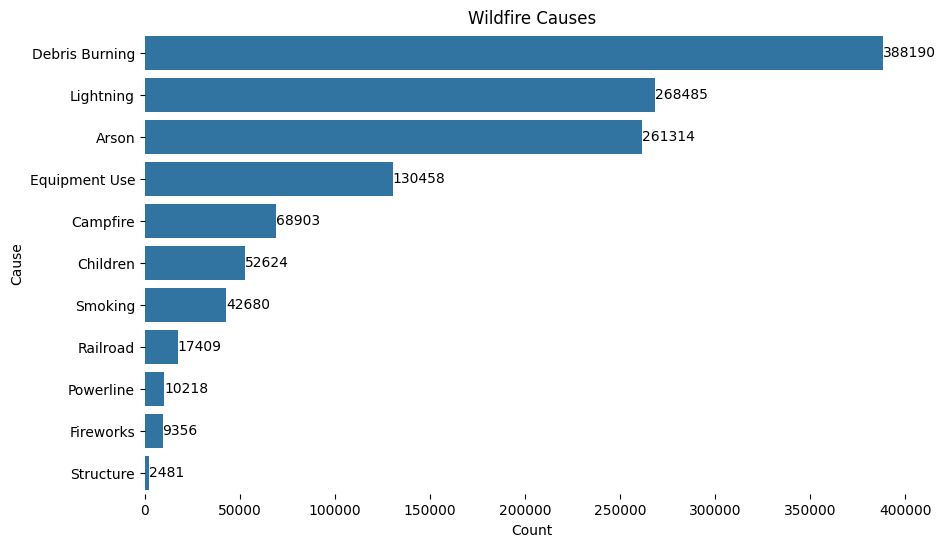

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')

# Add count values on each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

# removing spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

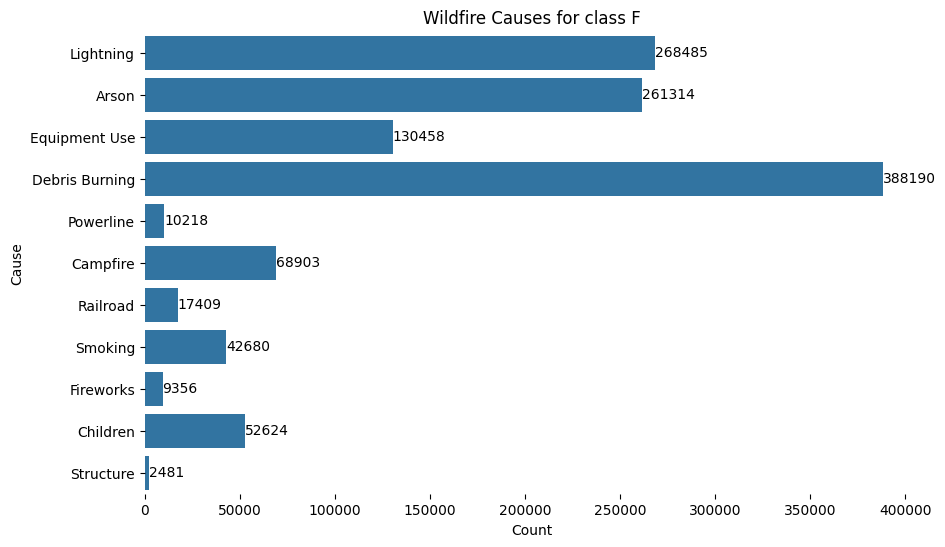

In [9]:
# fires_data[fires_data['FIRE_SIZE_CLASS']=='F']['STAT_CAUSE_DESCR'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data[fires_data['FIRE_SIZE_CLASS']=='F']['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes for class F')
plt.xlabel('Count')
plt.ylabel('Cause')

# Add count values on each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

# removing spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In [10]:
# # fires_data[fires_data['STAT_CAUSE_DESCR']=='Missing/Undefined']['FIRE_SIZE_CLASS'].value_counts()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create countplot
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(y='FIRE_SIZE_CLASS', data=fires_data, order=fires_data[fires_data['STAT_CAUSE_DESCR']=='Missing/Undefined']['FIRE_SIZE_CLASS'].value_counts().index)
# plt.title('Missing/Undefined values in each fire size class')
# plt.xlabel('Count')
# plt.ylabel('Class')

# # Add count values on each bar
# for bar in ax.patches:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

# # removing spine
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.show()

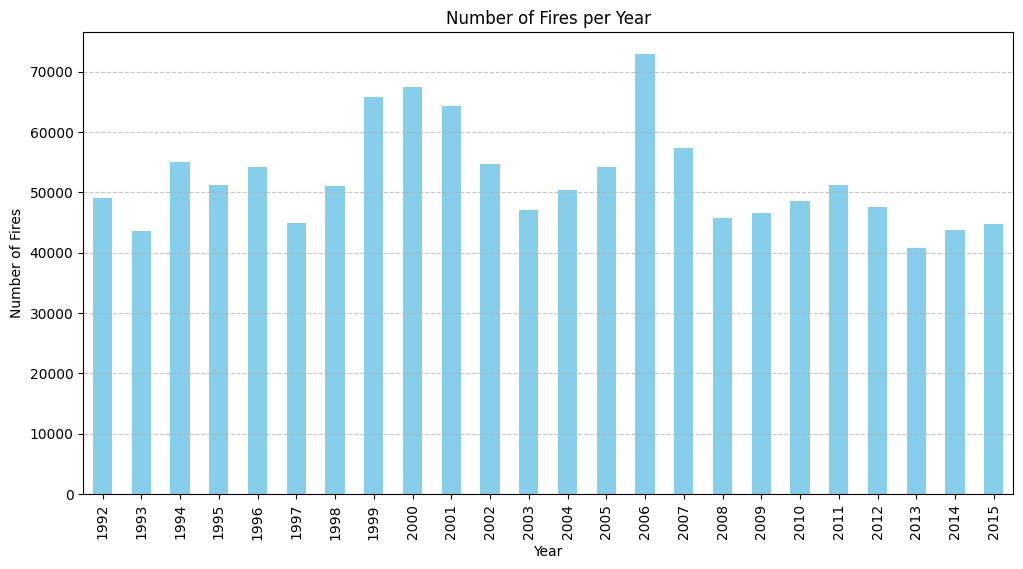

In [11]:
fires_per_year = fires_data['FIRE_YEAR'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
fires_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

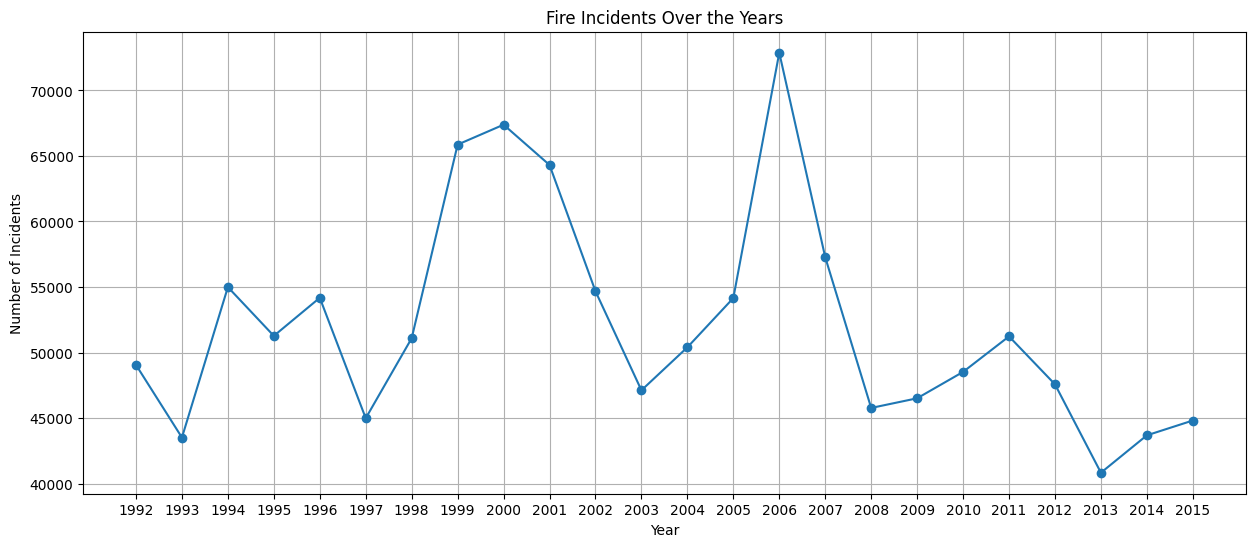

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each year
year_counts = fires_data['FIRE_YEAR'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(15, 6))
year_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Fire Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(year_counts.index)  # Ensure all years are displayed on x-axis
plt.show()


In [13]:
highest_year = fires_data['FIRE_YEAR'].max()
lowest_year = fires_data['FIRE_YEAR'].min()

# Get value counts for highest and lowest years
highest_year_count = fires_data['FIRE_YEAR'].value_counts().loc[highest_year]
lowest_year_count = fires_data['FIRE_YEAR'].value_counts().loc[lowest_year]

print("Highest year:", highest_year)
print("Highest year value count:", highest_year_count)
print("Lowest year:", lowest_year)
print("Lowest year value count:", lowest_year_count)


Highest year: 2015
Highest year value count: 44815
Lowest year: 1992
Lowest year value count: 49057


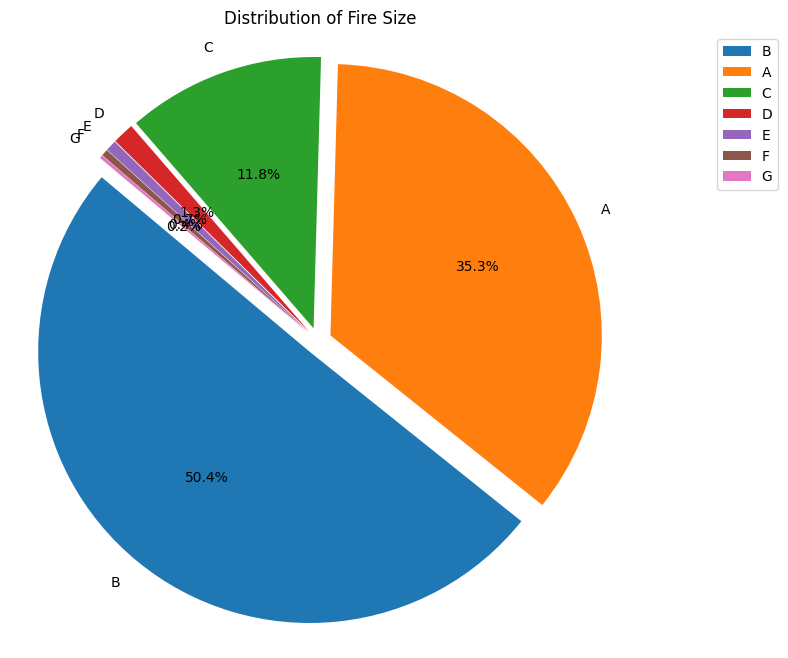

In [14]:
# Calculate value counts for 'fire_SIZE'
size_counts = fires_data['FIRE_SIZE_CLASS'].value_counts()
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140,explode=explode)

# Add a legend to display percentage values
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10)
plt.title('Distribution of Fire Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


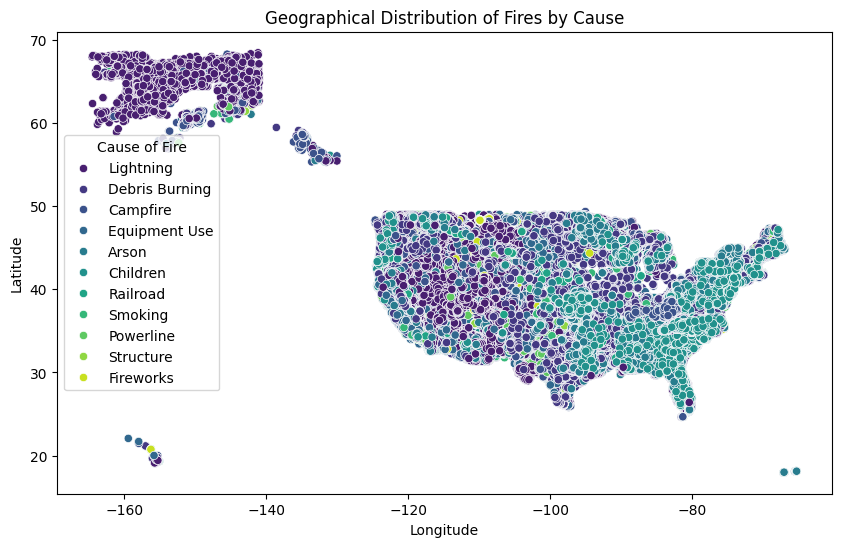

In [15]:
import seaborn as sns

# Scatter plot of fires' geographical distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=fires_data, hue='STAT_CAUSE_DESCR', palette='viridis')
plt.title('Geographical Distribution of Fires by Cause')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cause of Fire')
plt.show()


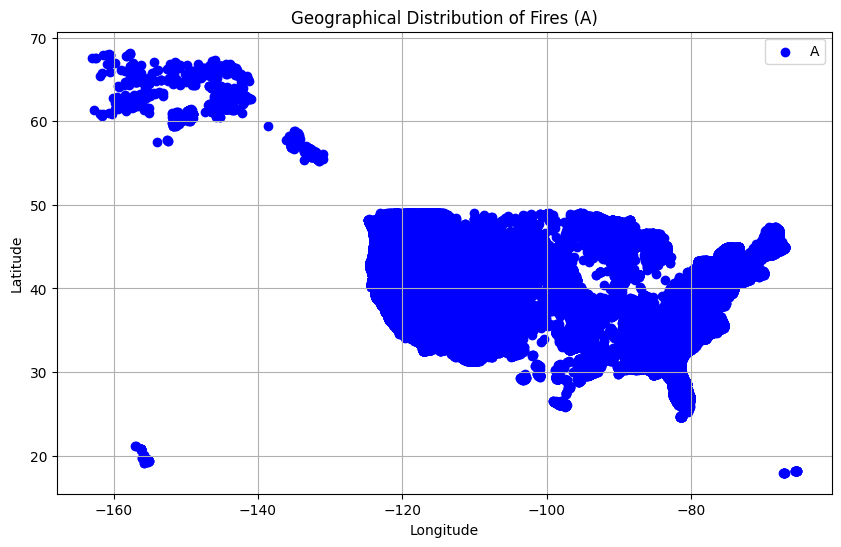

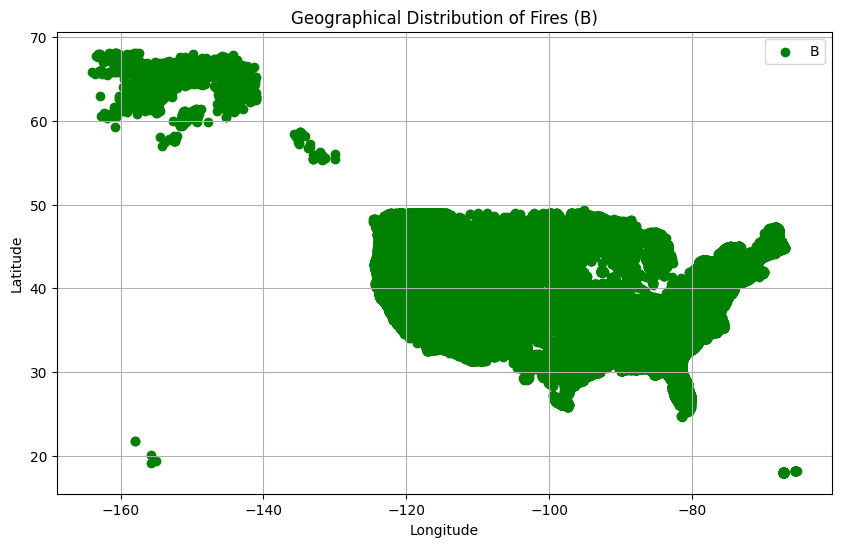

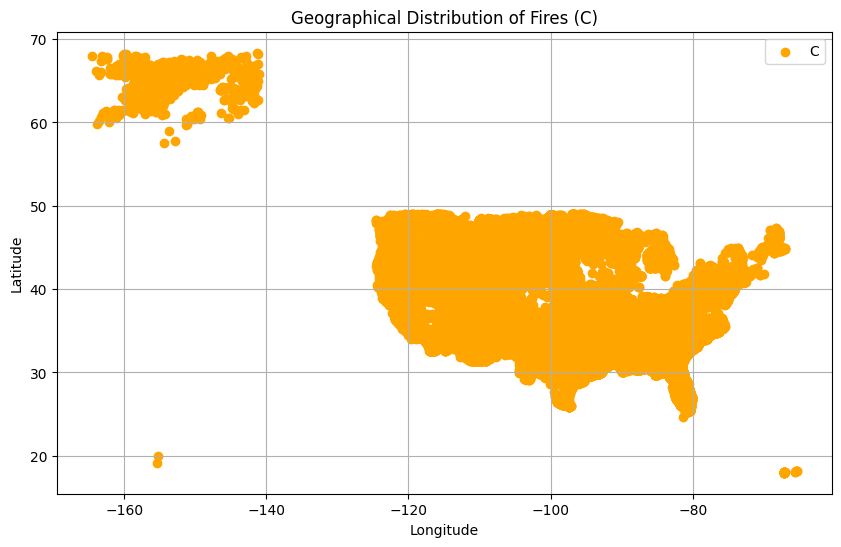

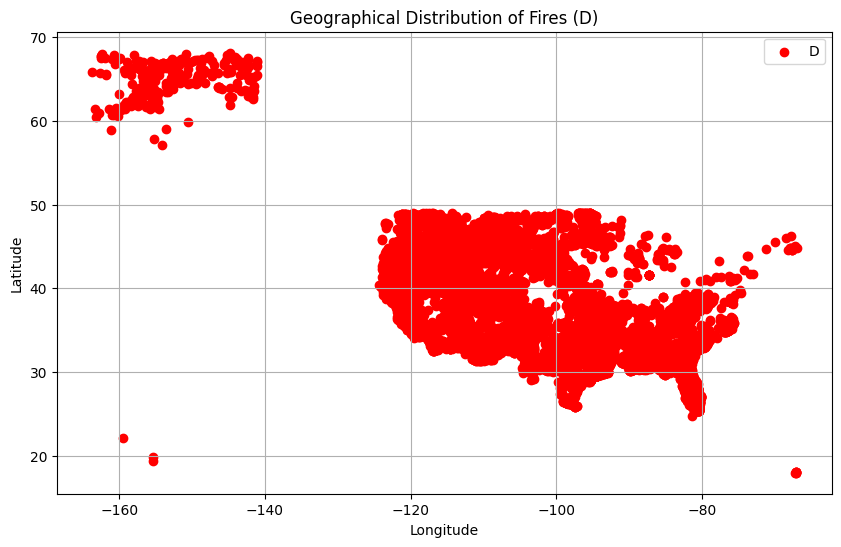

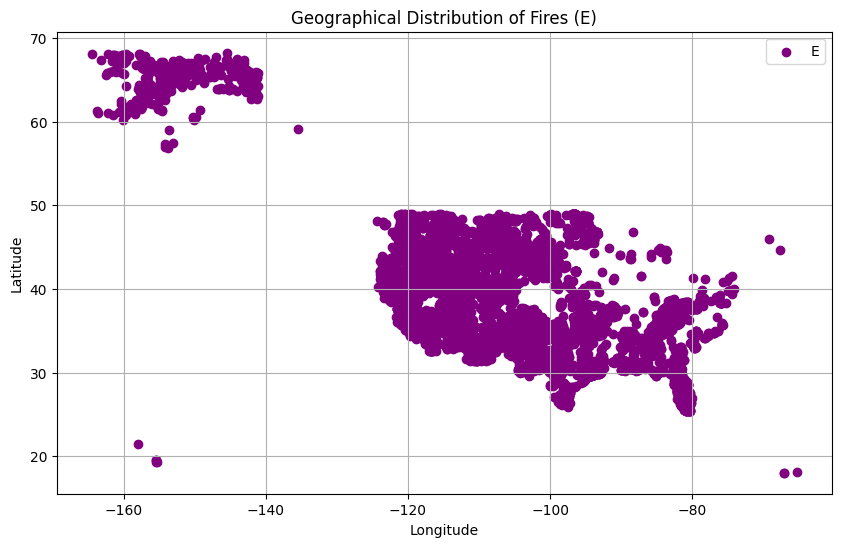

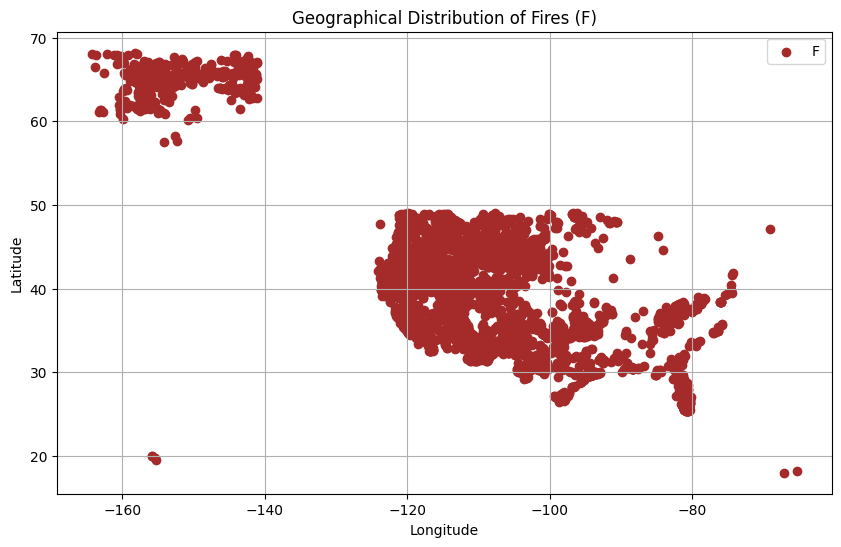

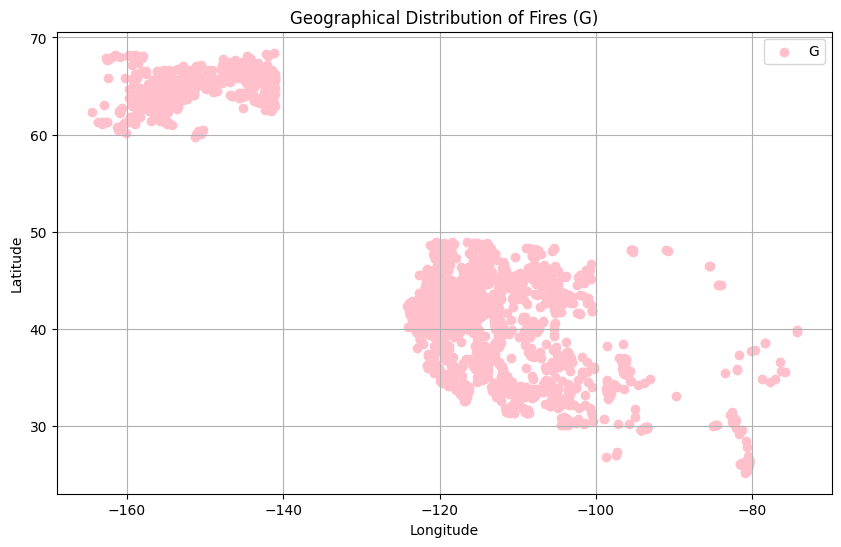

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define colors for different FIRE_SIZE_CLASS
colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red', 'E': 'purple', 'F': 'brown', 'G': 'pink'}

# Create a scatter plot for each FIRE_SIZE_CLASS
for size_class, group in fires_data.groupby('FIRE_SIZE_CLASS'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group['LONGITUDE'], group['LATITUDE'], color=colors[size_class], label=size_class)
    plt.title(f'Geographical Distribution of Fires ({size_class})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()


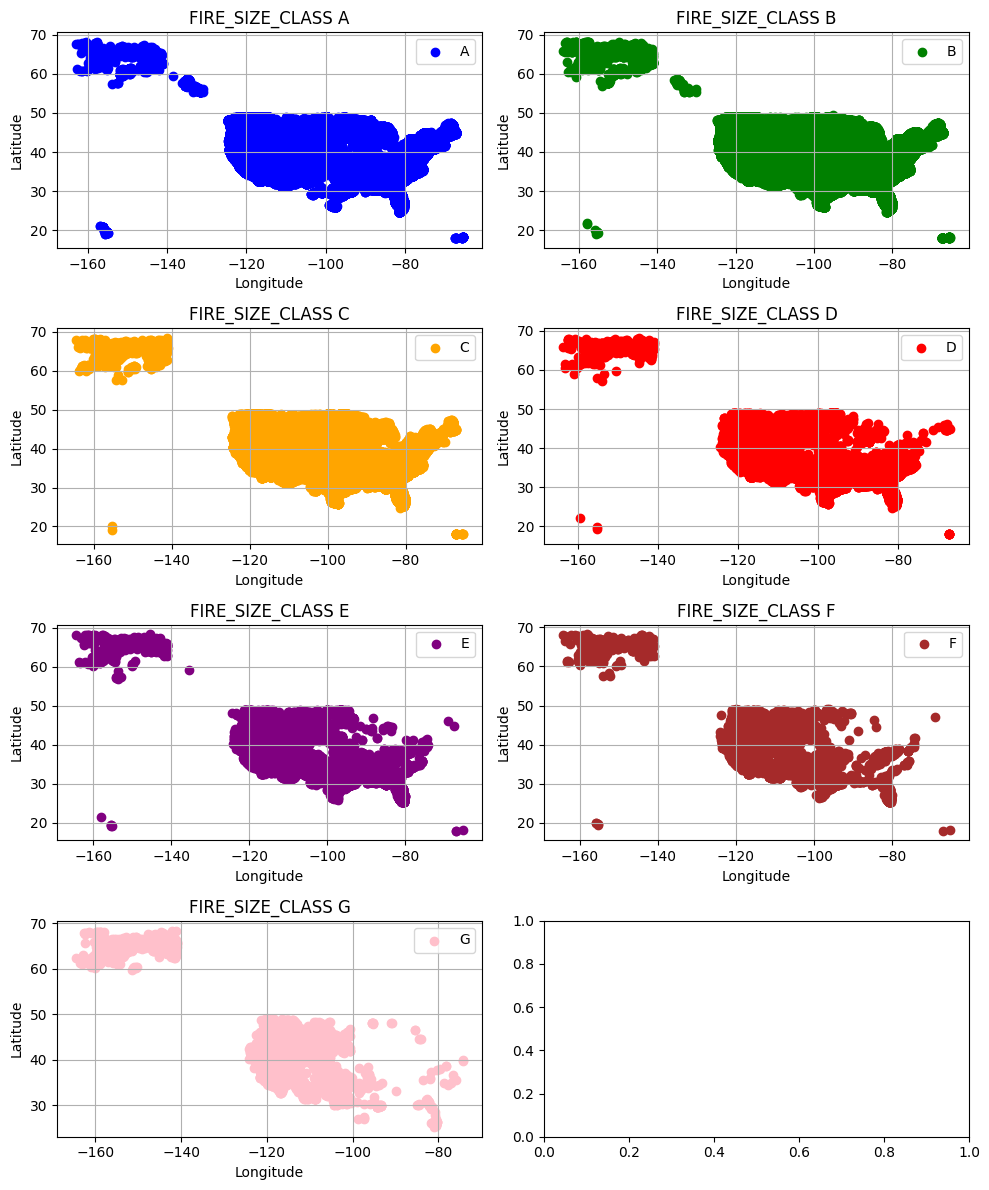

In [17]:
# Create a grid of plots
fig, axes = plt.subplots(4, 2, figsize=(10,12))

# Iterate over each FIRE_SIZE_CLASS and plot in the corresponding subplot
for idx, (size_class, group) in enumerate(fires_data.groupby('FIRE_SIZE_CLASS')):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    ax.scatter(group['LONGITUDE'], group['LATITUDE'], color=colors[size_class], label=size_class)
    ax.set_title(f'FIRE_SIZE_CLASS {size_class}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<ipython-input-18-78f937a74f7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fires_data, x='STATE', palette='viridis')


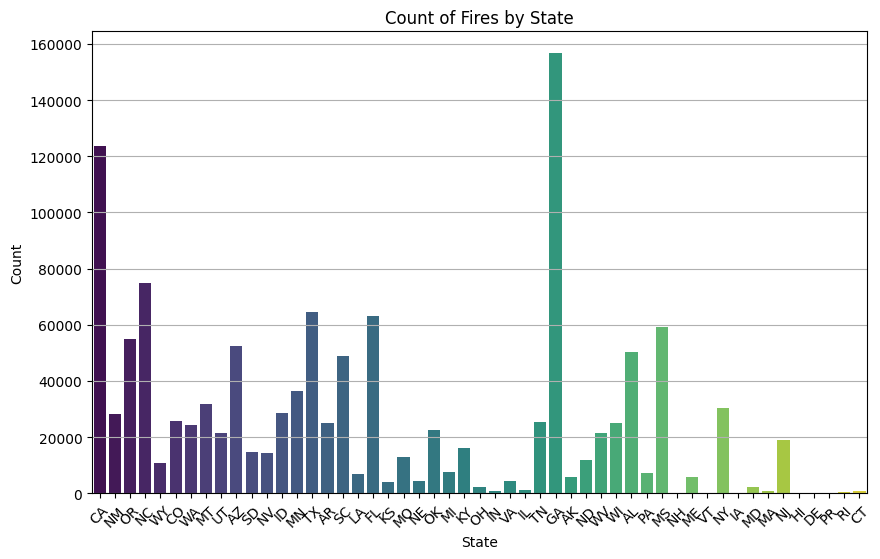

In [18]:
# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=fires_data, x='STATE', palette='viridis')
plt.title('Count of Fires by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

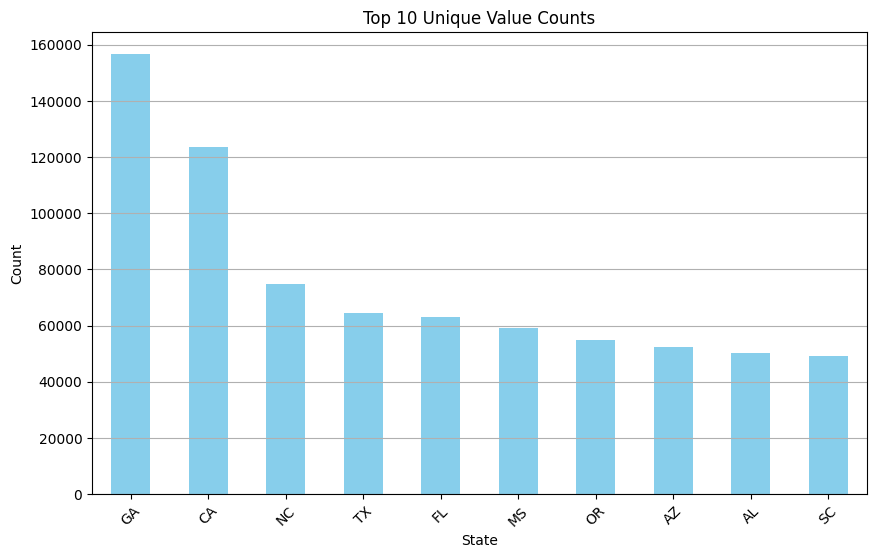

In [19]:
# Calculate value counts for the column
value_counts = fires_data['STATE'].value_counts()

# Select the top 10 unique values
top_10_values = value_counts.head(10)

# Plot the top 10 unique value counts
plt.figure(figsize=(10, 6))
top_10_values.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unique Value Counts')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

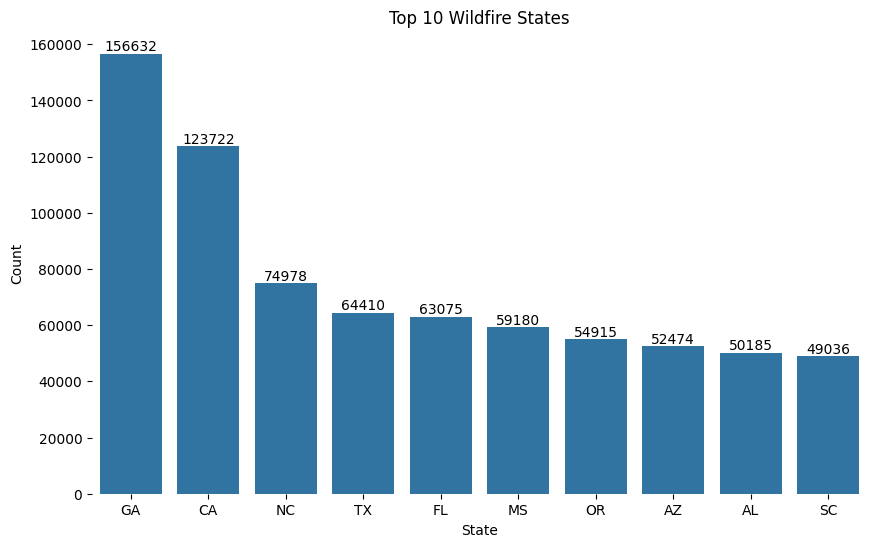

In [20]:

# Calculate value counts for the 'STATE' column
state_counts = fires_data['STATE'].value_counts()

# Select the top 10 states
top_10_states = state_counts.head(10).index

# Filter the DataFrame to include only the top 10 states
top_10_data = fires_data[fires_data['STATE'].isin(top_10_states)]

# Create countplot with vertical bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='STATE', data=top_10_data, order=top_10_states)
plt.title('Top 10 Wildfire States')
plt.xlabel('State')
plt.ylabel('Count')

# Add count values on each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom')

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

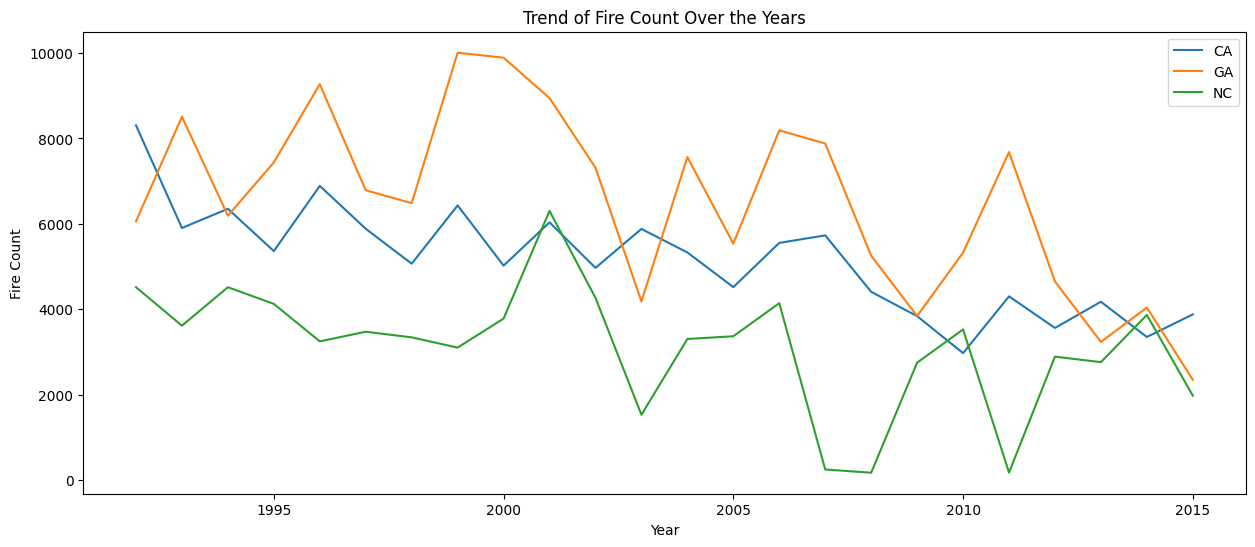

In [21]:

# Calculate fire count for each state and year
fire_counts = fires_data.groupby(['STATE', 'FIRE_YEAR']).size().reset_index(name='FIRE_COUNT')

# Select top two states with highest fire count
top_two_states = fire_counts.groupby('STATE')['FIRE_COUNT'].sum().nlargest(3).index

# Filter data for top two states
top_two_data = fire_counts[fire_counts['STATE'].isin(top_two_states)]

# Plot trend of fire count over the years for each top state
plt.figure(figsize=(15, 6))
for state, state_data in top_two_data.groupby('STATE'):
    plt.plot(state_data['FIRE_YEAR'], state_data['FIRE_COUNT'], label=state)

plt.title('Trend of Fire Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.legend()

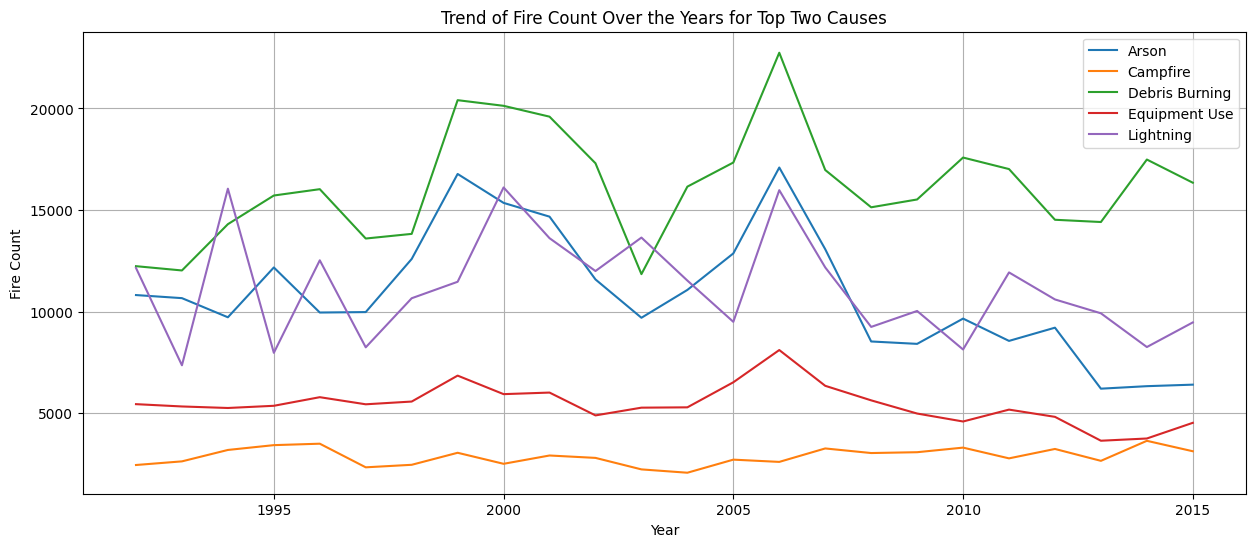

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate fire count for each cause and year
fire_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'FIRE_YEAR']).size().reset_index(name='FIRE_COUNT')

# Select top two causes with highest fire count
top_two_causes = fire_counts.groupby('STAT_CAUSE_DESCR')['FIRE_COUNT'].sum().nlargest(5).index

# Filter data for top two causes
top_two_data = fire_counts[fire_counts['STAT_CAUSE_DESCR'].isin(top_two_causes)]

# Plot trend of fire count over the years for each top cause
plt.figure(figsize=(15, 6))
for cause, cause_data in top_two_data.groupby('STAT_CAUSE_DESCR'):
    plt.plot(cause_data['FIRE_YEAR'], cause_data['FIRE_COUNT'], label=cause)

plt.title('Trend of Fire Count Over the Years for Top Two Causes')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
top_5 = fires_data.nlargest(5, 'FIRE_SIZE')


print("Top 5 incidents with highest acres burnt (selected columns):")
top_5[['STAT_CAUSE_DESCR', 'STATE', 'FIRE_SIZE']] # Selecting specific columns

Top 5 incidents with highest acres burnt (selected columns):


,STAT_CAUSE_DESCR,STATE,FIRE_SIZE
259547,Lightning,AK,49786.0
1124348,Lightning,CO,49628.0
104635,Lightning,CA,49551.0
339224,Lightning,FL,49500.0
1210216,Lightning,AK,49446.0


In [24]:

# Find the incident with the least acres burnt
least = fires_data.nsmallest(1, 'FIRE_SIZE')

print("\nIncident with the least acres burnt (selected columns):")
least[['STAT_CAUSE_DESCR', 'STATE', 'FIRE_SIZE']]


Incident with the least acres burnt (selected columns):


,STAT_CAUSE_DESCR,STATE,FIRE_SIZE
442942,Children,PA,0.00009


In [25]:

# Calculate the number of wildfires per county
county_wildfires = fires_data['FIPS_NAME'].value_counts()

# Determine the county with the highest number of wildfires
highest_county = county_wildfires.idxmax()

# Filter data for the county with the highest number of wildfires
highest_county_data = fires_data[fires_data['FIPS_NAME'] == highest_county]

print(f"County with the highest number of wildfires: {highest_county}")

County with the highest number of wildfires: Coconino


In [26]:

# Calculate count of wildfires for each county and state
county_state_counts = fires_data.groupby(['STATE', 'FIPS_NAME']).size().reset_index(name='WILDFIRE_COUNT')

# Find county and state with the highest count of wildfires
max_wildfire_count_row = county_state_counts.loc[county_state_counts['WILDFIRE_COUNT'].idxmax()]

print("County and state with the highest number of wildfires:")
print(max_wildfire_count_row)


County and state with the highest number of wildfires:
STATE                   AZ
FIPS_NAME         Coconino
WILDFIRE_COUNT       14349
Name: 163, dtype: object


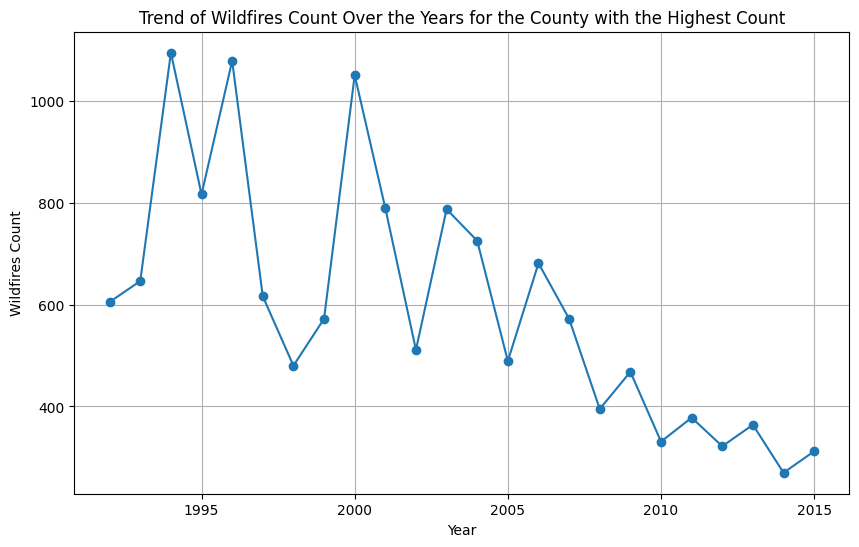

In [27]:

# Analyze trend of wildfires count over the years for the county with the highest count
max_wildfire_county_data = fires_data[(fires_data['FIPS_NAME'] == max_wildfire_count_row['FIPS_NAME'])]
wildfire_count_trend = max_wildfire_county_data.groupby('FIRE_YEAR').size()

# Plot trend of wildfires count over the years
plt.figure(figsize=(10, 6))
wildfire_count_trend.plot(marker='o')
plt.title('Trend of Wildfires Count Over the Years for the County with the Highest Count')
plt.xlabel('Year')
plt.ylabel('Wildfires Count')
plt.grid(True)
plt.show()



<Figure size 1500x1000 with 0 Axes>

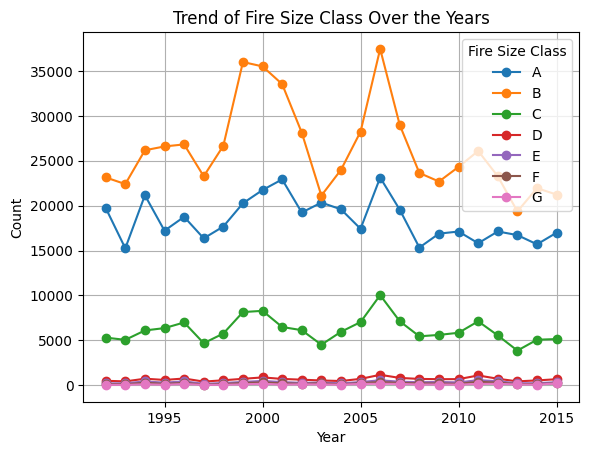

In [28]:
# Analyze trend of fire size class over the years
fire_size_class_trend = fires_data.groupby('FIRE_YEAR')['FIRE_SIZE_CLASS'].value_counts().unstack().fillna(0)

# Plot trend of fire size class over the years
plt.figure(figsize=(15, 10))
fire_size_class_trend.plot(marker='o')
plt.title('Trend of Fire Size Class Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fire Size Class')
plt.grid(True)
plt.show()

In [29]:
# box,violin for outliers

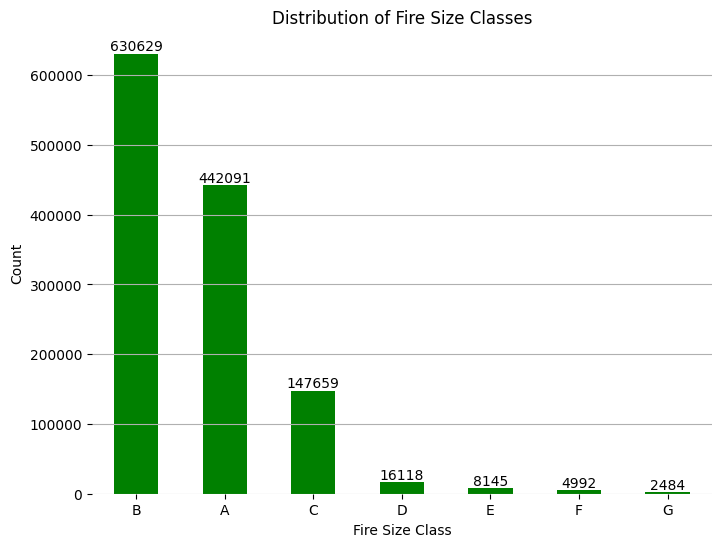

In [30]:
# ->Fire size class & count

# Calculate count of wildfires for each fire size class
fire_size_counts = fires_data['FIRE_SIZE_CLASS'].value_counts()

# Plot the distribution of fire size classes
plt.figure(figsize=(8, 6))
barplot = fire_size_counts.plot(kind='bar',color='green')

# Add count labels on top of the bars
for idx, count in enumerate(fire_size_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

# Remove the border of the graph
plt.box(False)

plt.title('Distribution of Fire Size Classes')
plt.xlabel('Fire Size Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

<ipython-input-31-c4880686b5c0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)
<ipython-input-31-c4880686b5c0>:31: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)


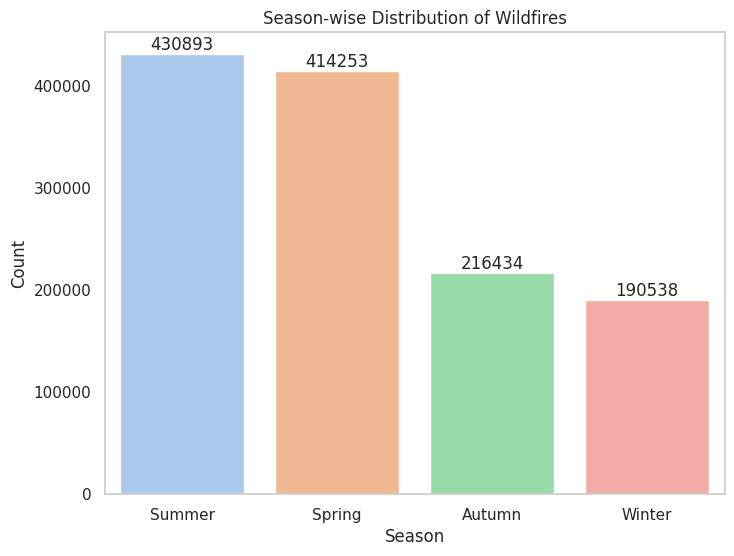

In [31]:
# → If possible season wire plot


# Convert DISCOVERY_DATE to datetime format
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'])

# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Extract month and map it to season
fires_data['MONTH'] = fires_data['DISCOVERY_DATE'].dt.month
fires_data['SEASON'] = fires_data['MONTH'].apply(get_season)

# Calculate count of wildfires for each season
season_counts = fires_data['SEASON'].value_counts()

# Set seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

# Plot the season-wise distribution of wildfires
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)

# Add count labels on top of the bars
for idx, count in enumerate(season_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Season-wise Distribution of Wildfires')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

<ipython-input-32-200702ee3bb5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=colors)
<ipython-input-32-200702ee3bb5>:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  barplot = sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=colors)


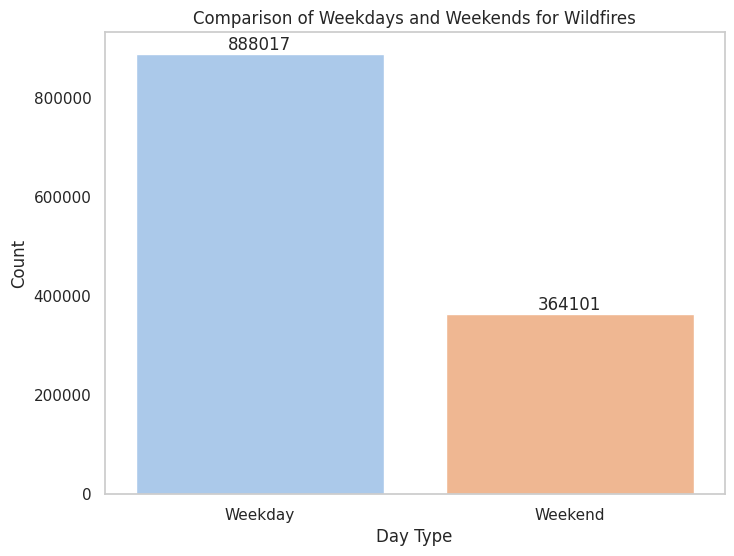

In [32]:
# → Week day & weekend comparing plot

# Convert DISCOVERY_DATE to datetime format
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'])

# Extract day of the week (1 to 7) from the datetime
fires_data['DISCOVERY_DOW'] = fires_data['DISCOVERY_DATE'].dt.dayofweek + 1

# Classify days as weekdays (1 to 5) or weekends (6 and 7)
fires_data['DAY_TYPE'] = fires_data['DISCOVERY_DOW'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

# Calculate count of wildfires for weekdays and weekends
day_type_counts = fires_data['DAY_TYPE'].value_counts()

# Set seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

# Plot the comparison between weekdays and weekends
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=colors)

# Add count labels on top of the bars
for idx, count in enumerate(day_type_counts):
    barplot.text(idx, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Comparison of Weekdays and Weekends for Wildfires')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

In [33]:
# # → If possible plots for E,W,N,S seperate region plots

# # Define bounding boxes for each region (latitude_min, latitude_max, longitude_min, longitude_max)
# regions = {
#     'East': (24.396308, 49.384358, -66.93457, -67.836914),   # East USA
#     'West': (24.396308, 49.384358, -125.0, -66.93457),       # West USA
#     'North': (49.384358, 71.538800, -125.0, -66.93457),      # North USA
#     'South': (24.396308, 24.396308, -125.0, -66.93457)       # South USA
# }

# # Plot wildfires for each region separately
# plt.figure(figsize=(12, 8))
# for region, bbox in regions.items():
#     filtered_data = fires_data[
#         (fires_data['LATITUDE'].between(bbox[0], bbox[1])) &
#         (fires_data['LONGITUDE'].between(bbox[2], bbox[3]))
#     ]
#     plt.scatter(filtered_data['LONGITUDE'], filtered_data['LATITUDE'], label=region)

# plt.title('Wildfires Distribution by Region')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend()
# plt.grid(True)
# plt.show()

In [34]:

# Define states belonging to each region (East, West, North, South)
regions = {
    'East': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL'],
    'West': ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'NM', 'AZ'],
    'North': ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'],
    'South': ['TX', 'OK', 'AR', 'LA', 'MS', 'TN', 'KY', 'AL']
}

# Filter the data based on regions
region_counts = {}
for region, states in regions.items():
    filtered_data = fires_data[fires_data['STATE'].isin(states)]
    region_counts[region] = len(filtered_data)

# # Calculate count of wildfires for weekdays and weekends
# region_type_counts = fires_data['DAY_TYPE'].value_counts()

# Add count labels on top of the bars
for idx, count in enumerate(region_counts):
    barplot.text(idx, count + 1, str(count), ha='center', va='bottom')

# Plot the bar plot for the count of wildfires in each region
plt.figure(figsize=(10, 6))
plt.bar(region_counts.keys(), region_counts.values(), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title('Count of Wildfires by Region')
plt.xlabel('Region')
plt.ylabel('Number of Wildfires')
plt.show()

TypeError: can only concatenate str (not "int") to str

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import folium

# Calculate count of occurrences for each state-FIPS_NAME combination
state_fips_counts = fires_data.groupby(['STATE', 'FIPS_NAME']).size().reset_index(name='Count')

# Create a folium map centered around the USA
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap layer to the map
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=state_fips_counts,
    columns=['STATE', 'Count'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count of Occurrences'
).add_to(map)

# Display the map
map


In [ ]:
# → Duration of fires high &low
# Find index of row with highest value of DURATION_TIME_HRS
max_duration_index = fires_data['DURATION_TIME_HRS'].idxmax()

# Find index of row with least value of DURATION_TIME_HRS
min_duration_index = fires_data['DURATION_TIME_HRS'].idxmin()

# Get corresponding FIPS_NAME and STATE for highest value
max_duration_fips_name = fires_data.loc[max_duration_index, 'FIPS_NAME']
max_duration_state = fires_data.loc[max_duration_index, 'STATE']

# Get corresponding FIPS_NAME and STATE for least value
min_duration_fips_name = fires_data.loc[min_duration_index, 'FIPS_NAME']
min_duration_state = fires_data.loc[min_duration_index, 'STATE']

print(f'Highest DURATION_TIME_HRS: {fires_data.loc[max_duration_index, "DURATION_TIME_HRS"]} hours')
print(f'Corresponding FIPS_NAME: {max_duration_fips_name}, STATE: {max_duration_state}')

print(f'Least DURATION_TIME_HRS: {fires_data.loc[min_duration_index, "DURATION_TIME_HRS"]} hours')
print(f'Corresponding FIPS_NAME: {min_duration_fips_name}, STATE: {min_duration_state}')


In [35]:
# → county highest & lowest
# Calculate count of occurrences for each FIPS_NAME
fips_counts = fires_data['FIPS_NAME'].value_counts()

# Find FIPS_NAME with highest count
highest_count_fips = fips_counts.idxmax()
highest_count_value = fips_counts.max()

# Find FIPS_NAME with lowest count
lowest_count_fips = fips_counts.idxmin()
lowest_count_value = fips_counts.min()

# Get the state for the FIPS_NAME with the highest count
highest_count_state = fires_data[fires_data['FIPS_NAME'] == highest_count_fips]['STATE'].iloc[0]

# Get the state for the FIPS_NAME with the lowest count
lowest_count_state = fires_data[fires_data['FIPS_NAME'] == lowest_count_fips]['STATE'].iloc[0]

print(f'Highest count FIPS_NAME: {highest_count_fips}, Count: {highest_count_value}, State: {highest_count_state}')
print(f'Lowest count FIPS_NAME: {lowest_count_fips}, Count: {lowest_count_value}, State: {lowest_count_state}')


Highest count FIPS_NAME: Coconino, Count: 14351, State: AZ
Lowest count FIPS_NAME: Branch, Count: 1, State: MI


In [36]:

# Sort the DataFrame by FIRE_SIZE in descending order to get highest values
df_highest = fires_data.sort_values(by='FIRE_SIZE', ascending=False).head(5)

# Sort the DataFrame by FIRE_SIZE in ascending order to get least values
df_least = fires_data.sort_values(by='FIRE_SIZE', ascending=True).head(5)

# Create subplots for highest and least graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot highest values
axs[0].bar(df_highest['FIPS_NAME'], df_highest['FIRE_SIZE'], color='skyblue')
axs[0].set_title('Highest 5 Counties')
axs[0].set_xlabel('County')
axs[0].set_ylabel('FIRE_SIZE')
axs[0].set_xticklabels(df_highest['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability

# Add values on top of each bar
for i, v in enumerate(df_highest['FIRE_SIZE']):
    axs[0].text(i, v + 10, str(v), ha='center')

# Plot least values
axs[1].bar(df_least['FIPS_NAME'], df_least['FIRE_SIZE'], color='lightcoral')
axs[1].set_title('Least 5 Counties')
axs[1].set_xlabel('County')
axs[1].set_ylabel('FIRE_SIZE')
axs[1].set_xticklabels(df_least['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability

# Add values on top of each bar
for i, v in enumerate(df_least['FIRE_SIZE']):
    axs[1].text(i, v + 10, str(v), ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-36-f169cc729177>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df_highest['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability
<ipython-input-36-f169cc729177>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df_least['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability
<ipython-input-36-f169cc729177>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 1105x44000631 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 2 Axes>

In [37]:

# Sort the DataFrame by FIRE_SIZE in descending order to get highest values
df_highest = fires_data.sort_values(by='FIRE_SIZE', ascending=False).head(5)

# Sort the DataFrame by FIRE_SIZE in ascending order to get least values
df_least = fires_data.sort_values(by='FIRE_SIZE', ascending=True).head(5)
# Create subplots for highest and least graphs with smaller figsize
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Reduced figsize to (10, 6)

# Plot highest values
axs[0].bar(df_highest['FIPS_NAME'], df_highest['FIRE_SIZE'], color='skyblue')
axs[0].set_title('Highest 5 Counties')
axs[0].set_xlabel('County')
axs[0].set_ylabel('FIRE_SIZE')
axs[0].set_xticklabels(df_highest['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability

# Add values on top of each bar
for i, v in enumerate(df_highest['FIRE_SIZE']):
    axs[0].text(i, v + 10, str(v), ha='center')

# Plot least values
axs[1].bar(df_least['FIPS_NAME'], df_least['FIRE_SIZE'], color='lightcoral')
axs[1].set_title('Least 5 Counties')
axs[1].set_xlabel('County')
axs[1].set_ylabel('FIRE_SIZE')
axs[1].set_xticklabels(df_least['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability

# Add values on top of each bar
for i, v in enumerate(df_least['FIRE_SIZE']):
    axs[1].text(i, v + 10, str(v), ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-37-c82f84f2aa64>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df_highest['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability
<ipython-input-37-c82f84f2aa64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df_least['FIPS_NAME'], rotation=45, ha='right')  # Rotate labels for better readability
<ipython-input-37-c82f84f2aa64>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 943x44000631 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 2 Axes>

In [38]:
fires_data.sort_values(by='FIRE_SIZE', ascending=False).head(5)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,...,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DOW,DURATION_TIME_HRS,MONTH,SEASON,DAY_TYPE
259547,2003,2003-06-13,165,14:21:00,1.0,Lightning,49786.0,G,64.266300,-145.185700,...,STATE,AK,240,Southeast Fairbanks,6,5,1586.400000,6,Summer,Weekday
1124348,2013,2013-06-18,170,20:49:00,1.0,Lightning,49628.0,G,37.683333,-107.166667,...,USFS,CO,53,Hinsdale,6,2,3208.183333,6,Summer,Weekday
104635,1999,1999-09-12,256,07:30:00,1.0,Lightning,49551.0,G,36.016944,-121.500556,...,USFS,CA,53,Monterey,9,7,682.500000,9,Autumn,Weekend
339224,2006,2006-06-02,154,NaN,1.0,Lightning,49500.0,G,26.251940,-80.580000,...,MISSING/NOT SPECIFIED,FL,11,Broward,6,5,59.445238,6,Summer,Weekday
1210216,2015,2015-06-23,175,17:35:00,1.0,Lightning,49446.0,G,62.216700,-160.900000,...,BLM,AK,290,Yukon-Koyukuk,6,2,1847.916667,6,Summer,Weekday


In [42]:
fires_data.head().T

,0,1,2,3,4
FIRE_YEAR,2004,2004,2004,2004,2004
DISCOVERY_DATE,2004-05-11 00:00:00,2004-05-30 00:00:00,2004-06-27 00:00:00,2004-06-27 00:00:00,2004-06-29 00:00:00
DISCOVERY_DOY,133,152,180,180,182
DISCOVERY_TIME,08:45:00,19:21:00,16:00:00,16:00:00,18:00:00
STAT_CAUSE_CODE,1.0,5.0,1.0,1.0,1.0
STAT_CAUSE_DESCR,Lightning,Debris Burning,Lightning,Lightning,Lightning
FIRE_SIZE,0.25,0.1,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,38.933056,38.984167,38.559167,38.559167,38.635278
LONGITUDE,-120.404444,-120.735556,-119.913333,-119.933056,-120.103611


In [47]:
fips_name_counts = fires_data['FIPS_NAME'].value_counts().head(5)
fips_name_counts

FIPS_NAME
Coconino     14351
Lincoln      13608
Jackson      11070
Riverside    10963
Marion        9121
Name: count, dtype: int64

In [55]:
top_fips_states = fires_data.set_index('FIPS_NAME').loc[fips_name_counts.index, 'STATE']
top_fips_states

array(['AZ', 'UT', 'NM', 'MT', 'WY', 'OR', 'NV', 'ID', 'MS', 'WA', 'OK',
       'WI', 'SD', 'MO', 'AR', 'GA', 'LA', 'ME', 'NC', 'TN', 'WV', 'CO',
       'NE', 'KY', 'KS', 'IL', 'IN', 'OH', 'AL', 'MN', 'IA', 'FL', 'MI',
       'TX', 'CA', 'SC'], dtype=object)

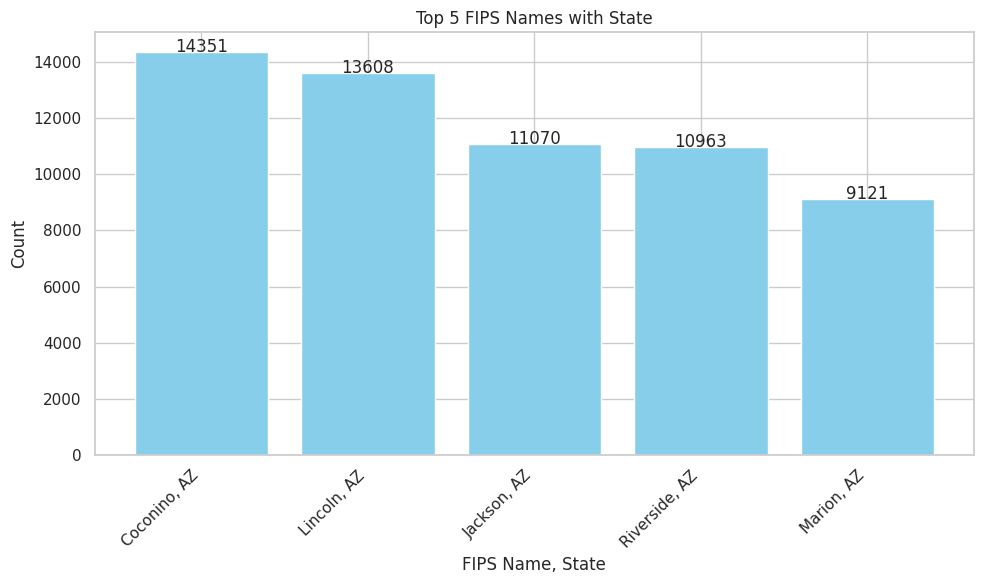

In [45]:
# Calculate value counts for the FIPS_NAME column
fips_name_counts = fires_data['FIPS_NAME'].value_counts().head(5)

# Get the corresponding states for the top 5 FIPS_NAME values
top_fips_states = fires_data.set_index('FIPS_NAME').loc[fips_name_counts.index, 'STATE']

# Combine FIPS_NAME and STATE into a single string for the x-axis labels
fips_state_labels = [f'{fips}, {state}' for fips, state in zip(fips_name_counts.index, top_fips_states)]

# Create a bar plot for the top 5 FIPS_NAME values with state labels
plt.figure(figsize=(10, 6))
plt.bar(fips_state_labels, fips_name_counts.values, color='skyblue')
plt.title('Top 5 FIPS Names with State')
plt.xlabel('FIPS Name, State')
plt.ylabel('Count')

# Add values on top of each bar
for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

# Show the plot with updated x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()


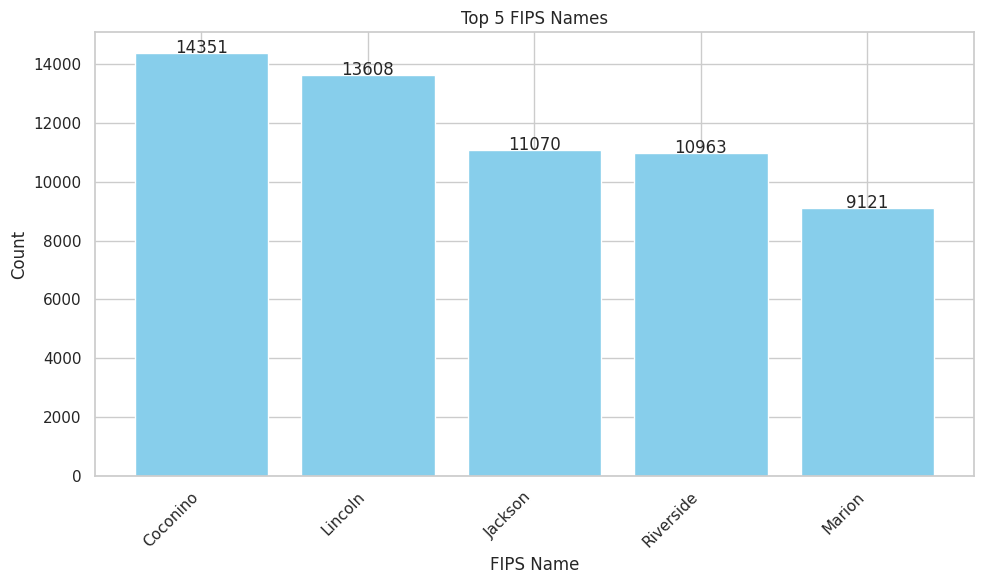

In [39]:

# Calculate value counts for the FIPS_NAME column
fips_name_counts = fires_data['FIPS_NAME'].value_counts().head(5)

# Create a bar plot for the top 5 FIPS_NAME values
plt.figure(figsize=(10, 6))
plt.bar(fips_name_counts.index, fips_name_counts.values, color='skyblue')
plt.title('Top 5 FIPS Names')
plt.xlabel('FIPS Name')
plt.ylabel('Count')

# Add values on top of each bar
for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

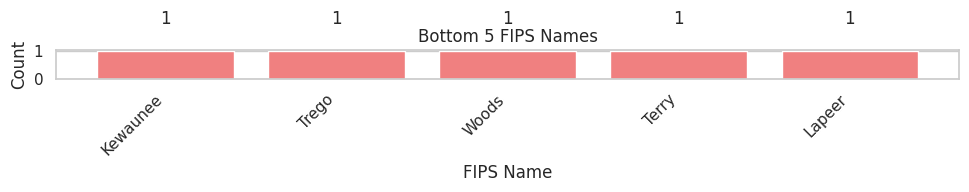

In [40]:
# Calculate value counts for the FIPS_NAME column
fips_name_counts = fires_data['FIPS_NAME'].value_counts().tail(5)

# Create a bar plot for the bottom 5 FIPS_NAME values
plt.figure(figsize=(10, 6))
plt.bar(fips_name_counts.index, fips_name_counts.values, color='lightcoral')
plt.title('Bottom 5 FIPS Names')
plt.xlabel('FIPS Name')
plt.ylabel('Count')

# Add values on top of each bar
for i, v in enumerate(fips_name_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

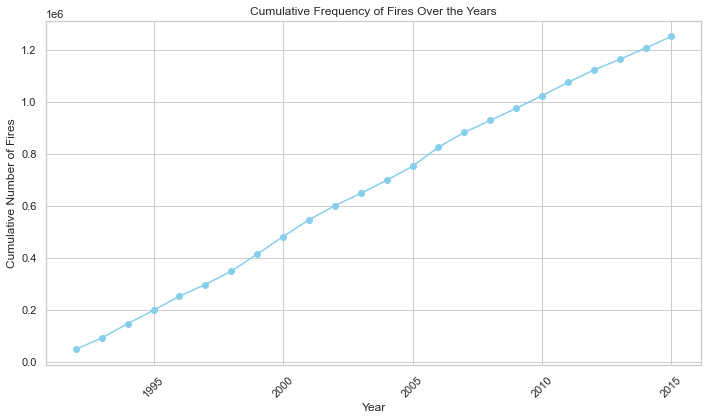

In [ ]:

# Calculate the count of occurrences of each FIRE_YEAR and the cumulative sum
fires_per_year = fires_data['FIRE_YEAR'].value_counts().sort_index()
cumulative_fires = fires_per_year.cumsum()

# Create a line plot for the cumulative frequency of fires over the years
plt.figure(figsize=(10, 6))
plt.plot(cumulative_fires.index, cumulative_fires.values, marker='o', color='skyblue', linestyle='-')
plt.title('Cumulative Frequency of Fires Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Fires')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.show()

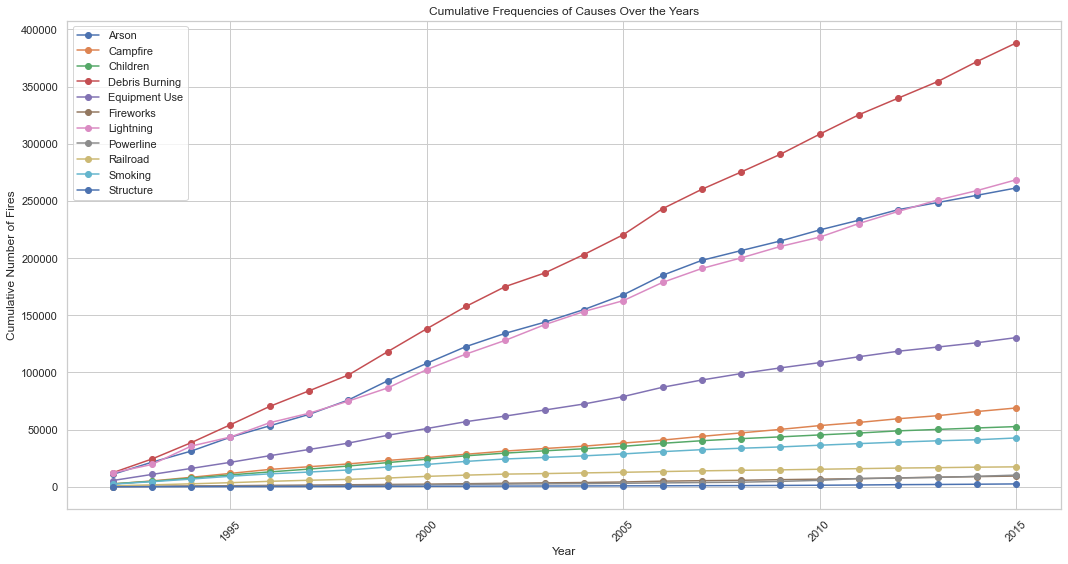

In [ ]:

# Calculate the count of occurrences of each combination of FIRE_YEAR and STAT_CAUSE_DESCR
fire_causes = fires_data.groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR']).size().unstack(fill_value=0)

# Calculate the cumulative sum for each cause category
cumulative_causes = fire_causes.cumsum()

# Create a line plot for the cumulative frequencies of causes over the years
plt.figure(figsize=(15, 8))
for cause in cumulative_causes.columns:
    plt.plot(cumulative_causes.index, cumulative_causes[cause], marker='o', label=cause)

plt.title('Cumulative Frequencies of Causes Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Fires')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.show()

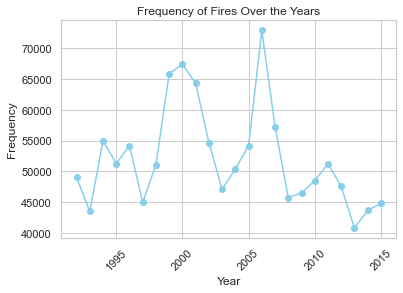

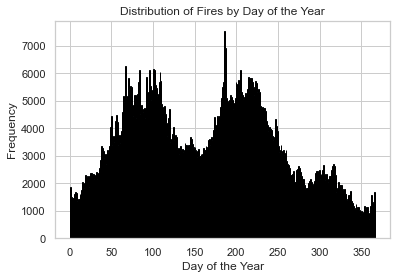

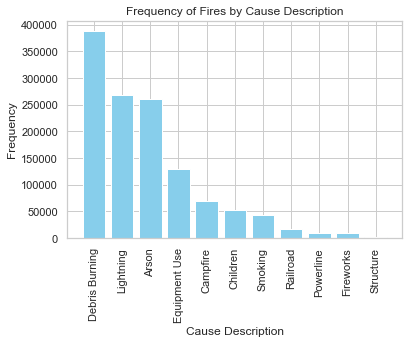

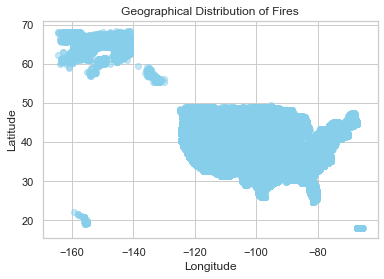

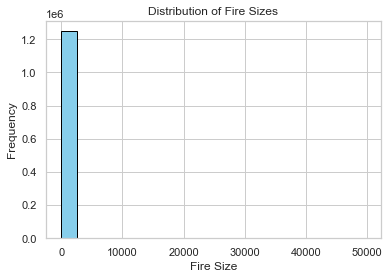

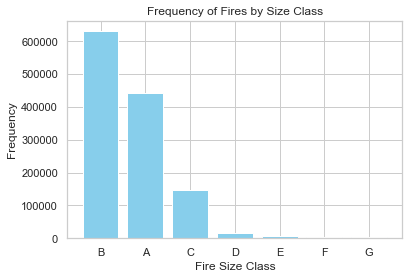

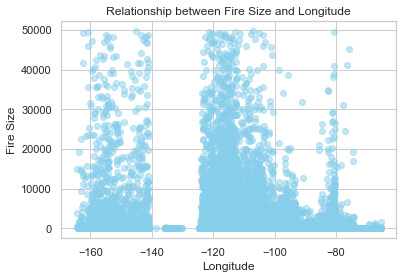

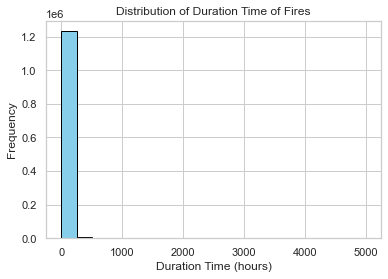

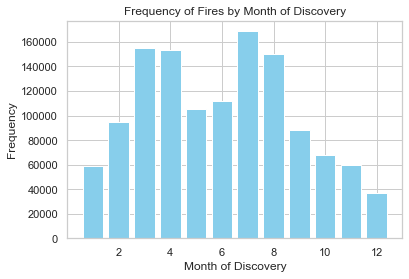

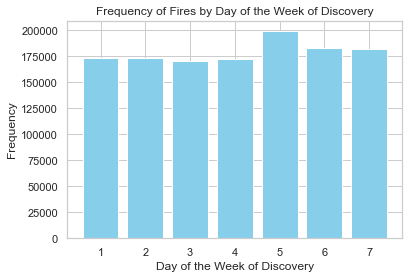

In [ ]:

# Example code snippets to create plots
# 1. Frequency of fires over the years (Line plot)
plt.plot(fires_data['FIRE_YEAR'].value_counts().sort_index(), marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Fires Over the Years')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of fires by day of the year (Histogram)
plt.hist(fires_data['DISCOVERY_DOY'], bins=range(1, 367), color='skyblue', edgecolor='black')
plt.xlabel('Day of the Year')
plt.ylabel('Frequency')
plt.title('Distribution of Fires by Day of the Year')
plt.show()

# 3. Frequency of fires by cause description (Bar plot)
plt.bar(fires_data['STAT_CAUSE_DESCR'].value_counts().index, fires_data['STAT_CAUSE_DESCR'].value_counts().values, color='skyblue')
plt.xlabel('Cause Description')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Cause Description')
plt.xticks(rotation=90)
plt.show()

# 4. Scatter plot: Geographical distribution of fires
plt.scatter(fires_data['LONGITUDE'], fires_data['LATITUDE'], color='skyblue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Fires')
plt.show()

# 5. Histogram: Distribution of fire sizes
plt.hist(fires_data['FIRE_SIZE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Fire Size')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Sizes')
plt.show()

# 6. Bar plot: Frequency of fires by size class
plt.bar(fires_data['FIRE_SIZE_CLASS'].value_counts().index, fires_data['FIRE_SIZE_CLASS'].value_counts().values, color='skyblue')
plt.xlabel('Fire Size Class')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Size Class')
plt.show()

# 7. Scatter plot: Relationship between fire size and longitude
plt.scatter(fires_data['LONGITUDE'], fires_data['FIRE_SIZE'], color='skyblue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Fire Size')
plt.title('Relationship between Fire Size and Longitude')
plt.show()

# 8. Histogram: Distribution of duration time of fires
plt.hist(fires_data['DURATION_TIME_HRS'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration Time (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Time of Fires')
plt.show()

# 9. Bar plot: Frequency of fires by month of discovery
plt.bar(fires_data['DISCOVERY_MONTH'].value_counts().index, fires_data['DISCOVERY_MONTH'].value_counts().values, color='skyblue')
plt.xlabel('Month of Discovery')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Month of Discovery')
plt.show()

# 10. Bar plot: Frequency of fires by day of the week of discovery
plt.bar(fires_data['DISCOVERY_DOW'].value_counts().index, fires_data['DISCOVERY_DOW'].value_counts().values, color='skyblue')
plt.xlabel('Day of the Week of Discovery')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by Day of the Week of Discovery')
plt.show()


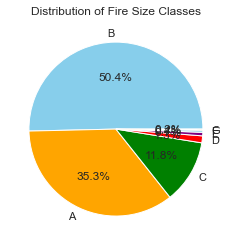

In [ ]:
plt.pie(fires_data['FIRE_SIZE_CLASS'].value_counts(), labels=fires_data['FIRE_SIZE_CLASS'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Fire Size Classes')
plt.show()


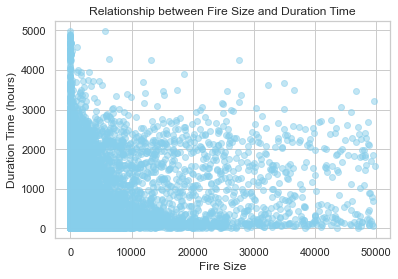

In [ ]:
plt.scatter(fires_data['FIRE_SIZE'], fires_data['DURATION_TIME_HRS'], color='skyblue', alpha=0.5)
plt.xlabel('Fire Size')
plt.ylabel('Duration Time (hours)')
plt.title('Relationship between Fire Size and Duration Time')
plt.show()


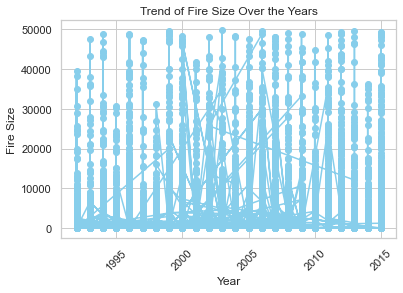

In [ ]:
plt.plot(fires_data['FIRE_YEAR'], fires_data['FIRE_SIZE'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Fire Size')
plt.title('Trend of Fire Size Over the Years')
plt.xticks(rotation=45)
plt.show()


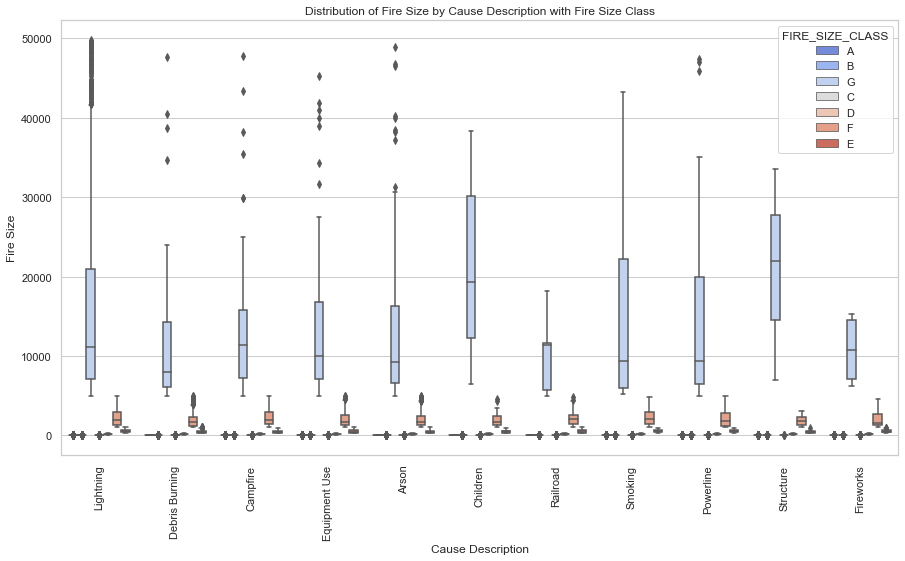

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', hue='FIRE_SIZE_CLASS', data=fires_data, palette='coolwarm')
plt.xlabel('Cause Description')
plt.ylabel('Fire Size')
plt.title('Distribution of Fire Size by Cause Description with Fire Size Class')
plt.xticks(rotation=90)
plt.show()


In [ ]:
sns.pairplot(fires_data[['FIRE_SIZE', 'DURATION_TIME_HRS', 'LATITUDE', 'LONGITUDE']])
plt.title('Pairwise Relationships')
plt.show()
